In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapefile

import sys
sys.path.append('..')
import geo_raster_viewer

In [4]:
# Load odisha directly (if you've saved it previously)
odisha_population = geo_raster_viewer.load("odisha_population")

In [2]:
# Make our viewer. This has population count for the globe in square kilometer pixels.
viewer = geo_raster_viewer.read_tif("../data/gpw_v4_population_count_rev10_2015_30_sec.tif")

In [3]:
# Load the shapefile
india_states = shapefile.Reader("../../India Shapefiles/GADM_Shapefile_IndiaAdmin/IND_adm1.shp")

In [4]:
# I know the state we want is the 25th shape in the file
print(india_states.records()[25])
odisha = india_states.shapes()[25]

[105, 'IND', 'India', 26, 'Odisha', 'IN.OR', 0, '', 'State', 'State', '', '']


In [5]:
# Extract the shapefile region from the viewer
odisha_population = viewer.extract_shapefile(odisha)

In [3]:
# Clip the pixels to make none of them negative
odisha_population.pixel_array = np.clip(odisha_population.pixel_array, 0.0, None)

In [ ]:
# Save this file so we don't have to clip it extract it every time and wait forever
odisha_population.save("odisha_population")

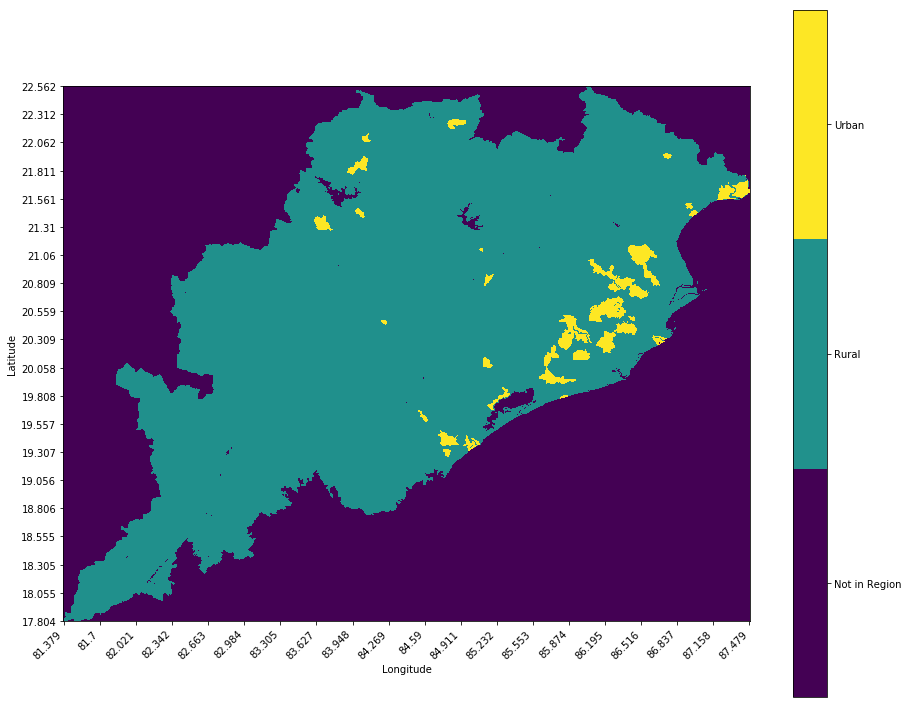

In [19]:
categorized_map = odisha_population.digitize([0, 700, np.inf])
categorized_map.plot(labels=['Rural', 'Urban'])

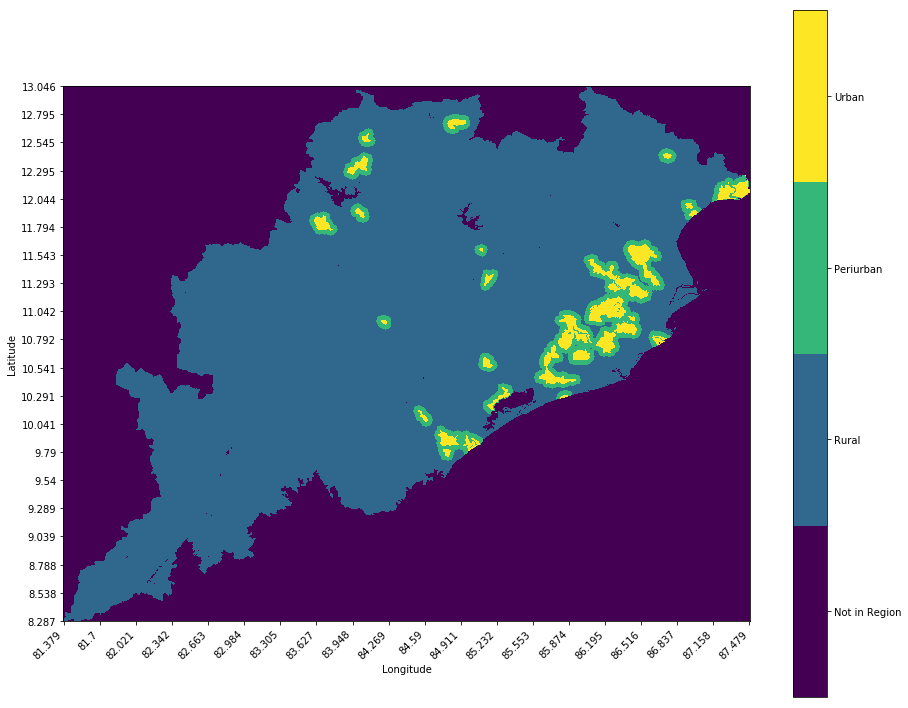

In [4]:
periurban_odisha = categorized_map.add_categorical_buffer(around=2, distance=5, level=2)
periurban_odisha.plot(labels=['Rural', 'Periurban', 'Urban'])

In [5]:
fig = periurban_odisha.plot(labels=['Rural', 'Periurban', 'Urban'])
fig.savefig("odisha_5km_periurban.png", dpi=300)

In [6]:
# Urban population percentage
(odisha_population.pixel_array[periurban_odisha.pixel_array == 3].sum() / 
 odisha_population.pixel_array[periurban_odisha.pixel_array != 0].sum())

0.17038575730977287

In [7]:
# Average urban population density
odisha_population.pixel_array[periurban_odisha.pixel_array == 3].mean()

1349.213398215396

In [8]:
# Periurban population percentage
(odisha_population.pixel_array[periurban_odisha.pixel_array == 2].sum() / 
 odisha_population.pixel_array[periurban_odisha.pixel_array != 0].sum())

0.09623755540334113

In [9]:
# Average periurban population density
odisha_population.pixel_array[periurban_odisha.pixel_array == 2].mean()

428.65194746119545

In [10]:
# Rural population percentage
(odisha_population.pixel_array[periurban_odisha.pixel_array == 1].sum() / 
 odisha_population.pixel_array[periurban_odisha.pixel_array != 0].sum())

0.733376687286886

In [11]:
# Average rural population density
odisha_population.pixel_array[periurban_odisha.pixel_array == 1].mean()

184.16781224549337